出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [1]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/09/49/569b50eb5e5a75b61f7a0bacb6029e9ea9c8a1190df55a39a31789244e09/matplotlib-3.9.0-cp311-cp311-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/33/0e/51ff72fac17e2500baf30b6b2a24be423a8d27e1625e5de99f585b852d74/contourpy-1.2.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/84/51/8203a3e6e475e6766ac950638d42f45470f36c6a4f0615ff0a1c1f2ed0d6/fonttools-4.51.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.7 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency i

In [14]:
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.font_manager as fm
jp_font_path = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'  # macOSの場合の日本語フォントパス
jp_font = fm.FontProperties(fname=jp_font_path)

def count_word_frequencies():
    word_counter = Counter()

    with open('neko.txt.mecab', 'r', encoding='utf-8') as infile:
        for line in infile:
            if line == 'EOS\n':
                continue
            
            surface, attr = line.split('\t')
            attr = attr.split(',')
            word_counter[surface] += 1

    return word_counter


In [17]:
def plot_top_words(word_counter, n=10):
    # 出現頻度の高い順に並べ、上位n語を取得
    top_words = word_counter.most_common(n)
    
    words, freqs = zip(*top_words)  # 単語と頻度を分割

    # 棒グラフを作成
    plt.figure(figsize=(10, 6))
    plt.bar(words, freqs, color='skyblue')
    plt.xlabel('単語', fontproperties=jp_font)
    plt.ylabel('出現頻度', fontproperties=jp_font)
    plt.title(f'出現頻度が高い上位{n}語', fontproperties=jp_font)
    plt.xticks(rotation=45, fontproperties=jp_font)
    plt.show()

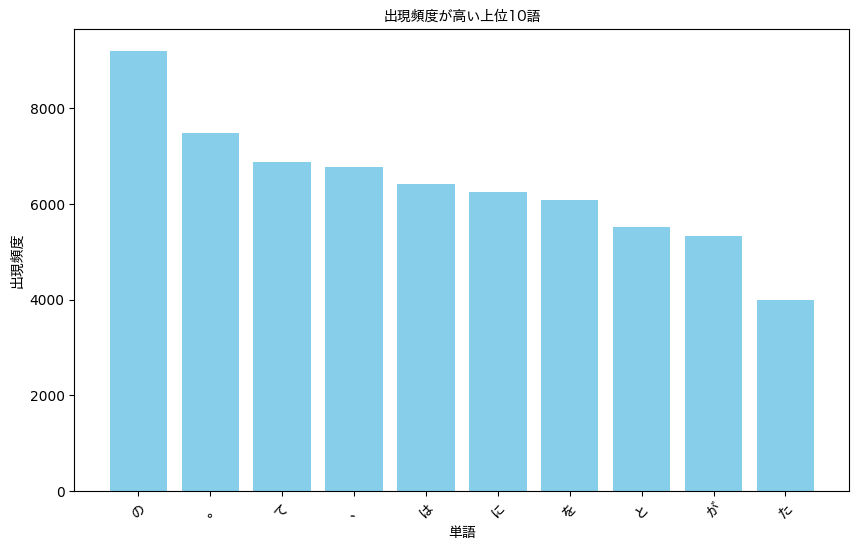

In [18]:
if __name__ == '__main__':
    word_counter = count_word_frequencies()
    plot_top_words(word_counter)